# Manipulator Proto

In [7]:
import pandas as pd
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import SMA, RSI, MACD

In [8]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-09-30 00:00:00-04:00 to 2024-09-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1258 non-null   float64
 1   high          1258 non-null   float64
 2   low           1258 non-null   float64
 3   close         1258 non-null   float64
 4   volume        1258 non-null   int64  
 5   dividends     1258 non-null   float64
 6   stock splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


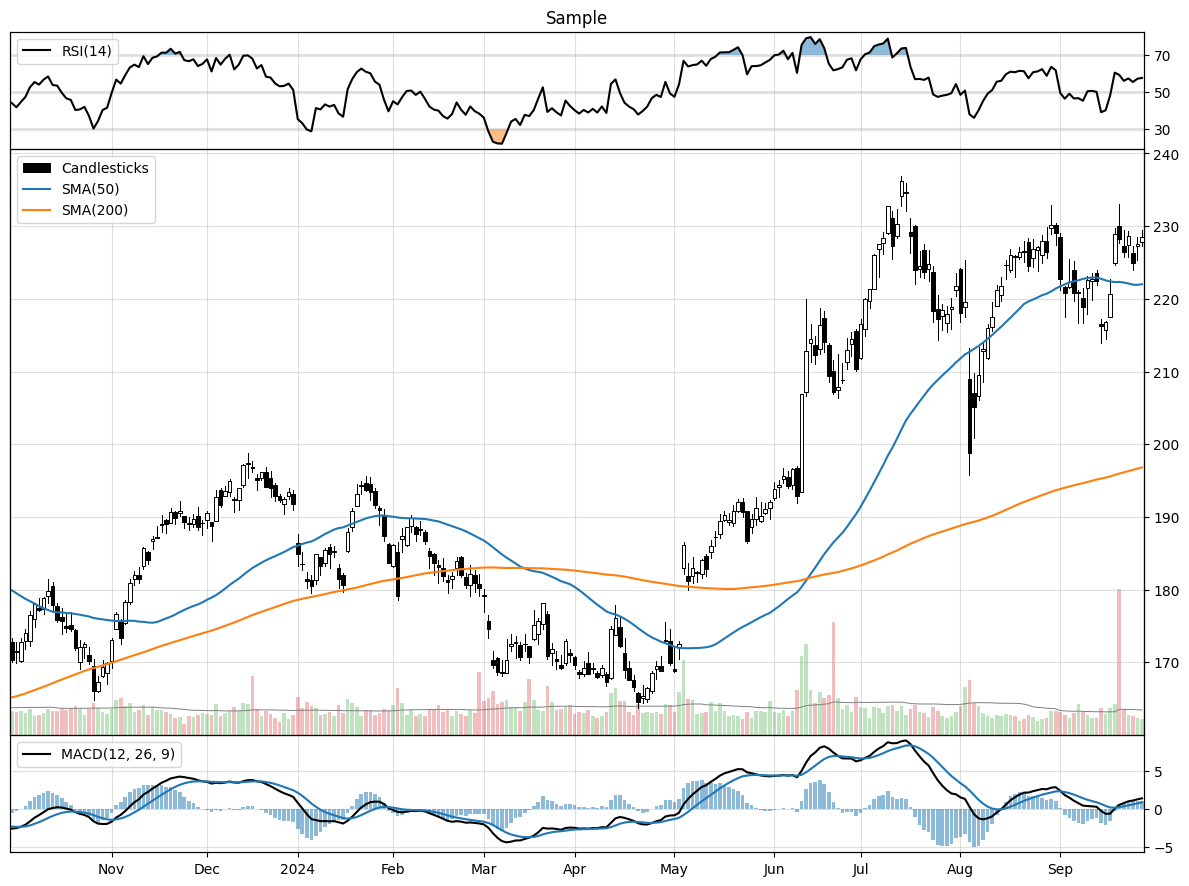

In [9]:
max_bars = 250
indicators = [Candlesticks(), Volume(), SMA(50), SMA(200), RSI(), MACD()]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)

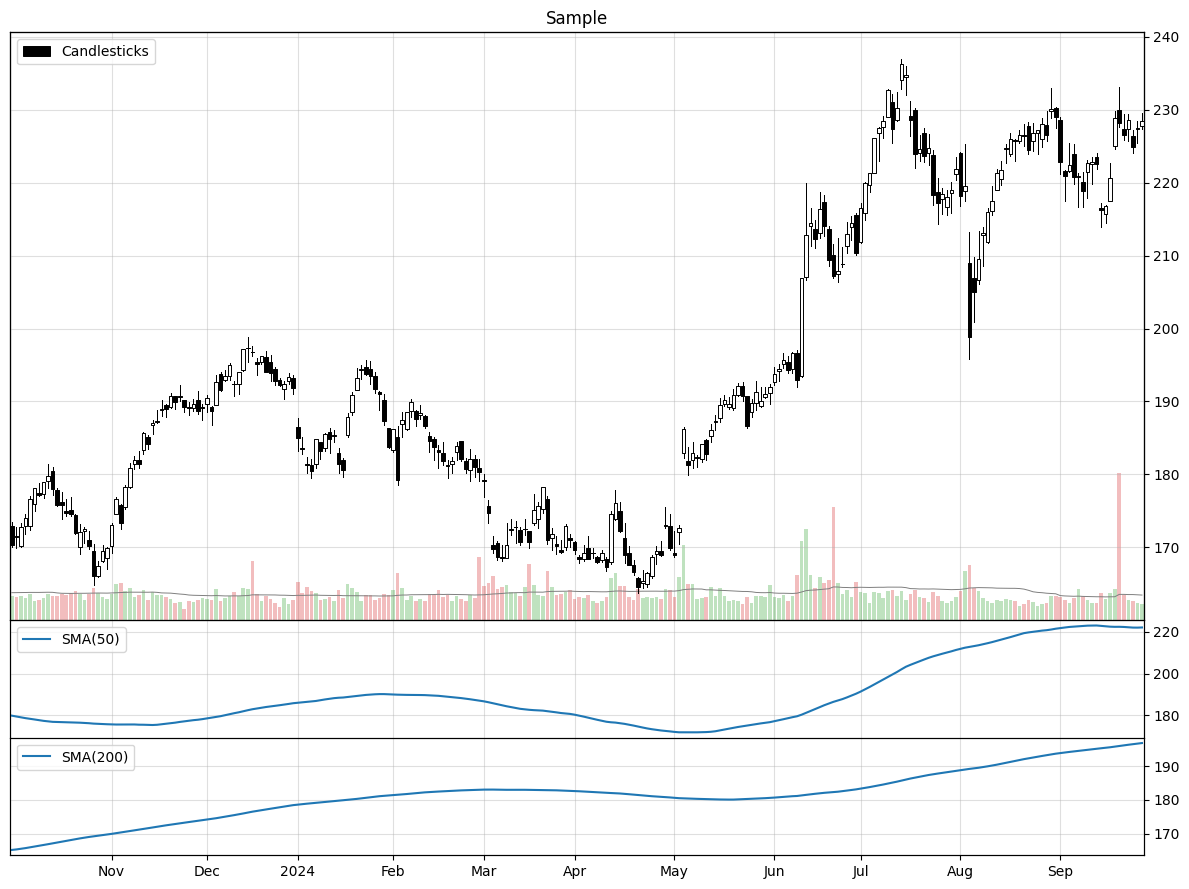

In [11]:
import warnings


class SameAxes:
    def __ror__(self, other):
        if not hasattr(other, "__dict__"):
            return NotImplemented

        other.__dict__.update(same_scale=True)
        return other


class NewAxes:
    def __ror__(self, other):
        if not hasattr(other, "__dict__"):
            return NotImplemented

        other.__dict__.update(same_scale=False)
        return other



max_bars = 250
indicators = [
    Candlesticks(),
    Volume(),
    SMA(50) | NewAxes(),
    SMA(200) | SameAxes(),
]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)
